In [1]:
# from imblearn.under_sampling import TomekLinks

In [2]:
from IPython.display import display, Markdown
import numpy as np
def set_frame_style(df,caption="",font_size='28px'):
    random_list=['Greys','Purples','Blues','Greens','Oranges','Reds','YlOrBr','YlOrRd','OrRd','PuRd','RdPu','BuPu','GnBu','PuBu','YlGnBu','PuBuGn','BuGn','YlGn']

    """helper function to set the style of the dataframe"""

    return df.style.background_gradient(cmap=np.random.choice(random_list)).set_caption(caption).set_table_styles([{'selector':'caption',
                                                                                                                    'props':[('color','Brown'),
                                                                                                                             ('font-size','font_size'),
                                                                                                                             ('font-weight','bold')]}])


In [3]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
original=pd.read_csv("cirrhosis.csv")
sub=pd.read_csv("sample_submission.csv")

In [4]:
ids=test['id']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [5]:
original.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [6]:
set_frame_style(train.head(10),"Synthetically Generated Data\n")

In [7]:
set_frame_style(original.head(20),"Original Data\n")

In [8]:
from prettytable import PrettyTable

table=PrettyTable()
table.field_names=['Column Name','Data Type','Missing Values','Unique Values','Count of Unique Values']
for i in list(train.columns):
    table.add_row([i,train[i].dtype,train[i].isnull().sum(),train[i].nunique(),train[i].value_counts().sum()])
print(table)

+---------------+-----------+----------------+---------------+------------------------+
|  Column Name  | Data Type | Missing Values | Unique Values | Count of Unique Values |
+---------------+-----------+----------------+---------------+------------------------+
|       id      |   int64   |       0        |      7905     |          7905          |
|     N_Days    |   int64   |       0        |      461      |          7905          |
|      Drug     |   object  |       0        |       2       |          7905          |
|      Age      |   int64   |       0        |      391      |          7905          |
|      Sex      |   object  |       0        |       2       |          7905          |
|    Ascites    |   object  |       0        |       2       |          7905          |
|  Hepatomegaly |   object  |       0        |       2       |          7905          |
|    Spiders    |   object  |       0        |       2       |          7905          |
|     Edema     |   object  |   

In [9]:
table=PrettyTable()
table.field_names=["Featues","Unique values"]
for i in original.columns:
    table.add_row([i,original[i].nunique()])

print("Unique values in the original dataset\n")
print(table)


Unique values in the original dataset

+---------------+---------------+
|    Featues    | Unique values |
+---------------+---------------+
|       ID      |      418      |
|     N_Days    |      399      |
|     Status    |       3       |
|      Drug     |       2       |
|      Age      |      344      |
|      Sex      |       2       |
|    Ascites    |       2       |
|  Hepatomegaly |       2       |
|    Spiders    |       2       |
|     Edema     |       3       |
|   Bilirubin   |       98      |
|  Cholesterol  |      201      |
|    Albumin    |      154      |
|     Copper    |      158      |
|    Alk_Phos   |      295      |
|      SGOT     |      179      |
| Tryglicerides |      146      |
|   Platelets   |      243      |
|  Prothrombin  |       48      |
|     Stage     |       4       |
+---------------+---------------+


In [10]:
original.rename(columns={'ID': 'id'}, inplace=True)
df=pd.concat([train,original],axis=0)
df.tail()

id  N_Days Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
413  414     681  NaN  24472   F     NaN          NaN     NaN     N   
414  415    1103  NaN  14245   F     NaN          NaN     NaN     N   
415  416    1055  NaN  20819   F     NaN          NaN     NaN     N   
416  417     691  NaN  21185   F     NaN          NaN     NaN     N   
417  418     976  NaN  19358   F     NaN          NaN     NaN     N   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  Tryglicerides  \
413        1.2          NaN     2.96     NaN       NaN   NaN            NaN   
414        0.9          NaN     3.83     NaN       NaN   NaN            NaN   
415        1.6          NaN     3.42     NaN       NaN   NaN            NaN   
416        0.8          NaN     3.75     NaN       NaN   NaN            NaN   
417        0.7          NaN     3.29     NaN       NaN   NaN            NaN   

     Platelets  Prothrombin  Stage Status  
413      174.0         10.9    3.0      D  
414      180.0         11.2    4.0      C  
415      143.0          9.9    3.0      C  
416      269.0         10.4    3.0      C  
417      350.0         10.6    4.0      C

In [11]:
# df.drop(['id'],axis='columns',inplace=True)
# median=df.median()
# df.fillna(median,inplace=True)

df=df.dropna()
df=df.sample(frac=1).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8181 entries, 0 to 8180
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8181 non-null   int64  
 1   N_Days         8181 non-null   int64  
 2   Drug           8181 non-null   object 
 3   Age            8181 non-null   int64  
 4   Sex            8181 non-null   object 
 5   Ascites        8181 non-null   object 
 6   Hepatomegaly   8181 non-null   object 
 7   Spiders        8181 non-null   object 
 8   Edema          8181 non-null   object 
 9   Bilirubin      8181 non-null   float64
 10  Cholesterol    8181 non-null   float64
 11  Albumin        8181 non-null   float64
 12  Copper         8181 non-null   float64
 13  Alk_Phos       8181 non-null   float64
 14  SGOT           8181 non-null   float64
 15  Tryglicerides  8181 non-null   float64
 16  Platelets      8181 non-null   float64
 17  Prothrombin    8181 non-null   float64
 18  Stage   

## Feature Engineering

In [12]:
df.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [13]:
def convert_days_to_years(age_in_days):
    days_in_year=365.25
    age_in_years=age_in_days/days_in_year
    return age_in_years

def add_cols(df):
    age=list(df['Age'])
    age_in_year=[]
    for i in age:
        age_in_year.append(convert_days_to_years(i))
    df["Age_in_years"]=pd.Series(age_in_year)
    return df

df=add_cols(df)
set_frame_style(df.head(10))

Thrombocytopenia --> Persent:1, Absent:0

In [14]:
threshould_thrombocytopenia=150

In [15]:
df["Thrombocytopenia"]=df["Platelets"].apply(lambda x: 1 if x<threshould_thrombocytopenia else 0)
test["Thrombocytopenia"]=test["Platelets"].apply(lambda x: 1 if x<threshould_thrombocytopenia else 0)
set_frame_style(test.head(10))

In [16]:
df["Thrombocytopenia"].value_counts()

0    7449
1     732
Name: Thrombocytopenia, dtype: int64

Elevateed Alkaline phosphatase indicator

In [17]:
threshould_ALP_up=147 # upper limit of normal range
threshould_ALP_low=44 # lower limit of normal range
df["Alk_Phos"].describe()

count     8181.000000
mean      1822.813348
std       1911.409689
min        289.000000
25%        834.000000
50%       1181.000000
75%       1857.000000
max      13862.400000
Name: Alk_Phos, dtype: float64

Normal copper levels

In [18]:
normal_copper_range=[62,140]

df["Normal_copper"]=df["Copper"].apply(lambda x: 1 if x>normal_copper_range[0] and x<normal_copper_range[1] else 0)
test["Normal_copper"]=test["Copper"].apply(lambda x: 1 if x>normal_copper_range[0] and x<normal_copper_range[1] else 0)

Normal Albumin levels

In [19]:
df["Albumin"].describe()

count    8181.000000
mean        3.547260
std         0.348327
min         1.960000
25%         3.350000
50%         3.580000
75%         3.770000
max         4.640000
Name: Albumin, dtype: float64

In [20]:
normal_albumin_range=[3.4,5.4]
df["Normal_albumin"]=df["Albumin"].apply(lambda x: 1 if x>normal_albumin_range[0] and x<normal_albumin_range[1] else 0)
test["Normal_albumin"]=test["Albumin"].apply(lambda x: 1 if x>normal_albumin_range[0] and x<normal_albumin_range[1] else 0)


Normal bilirubin levels

In [21]:
normal_bilirubin_range=[0.2,1.2]

df['Normal_bilirubin']=df["Bilirubin"].apply(lambda x: 1 if x>normal_bilirubin_range[0] and x<normal_bilirubin_range[1] else 0)
test["Normal_bilirubin"]=test["Bilirubin"].apply(lambda x: 1 if x>normal_bilirubin_range[0] and x<normal_bilirubin_range[1] else 0)

## Exploratory data analysis

In [22]:
set_frame_style(df.head(20))

In [23]:
set_frame_style(train.head())

In [24]:
numeric_cols=train.select_dtypes(include=['int64','float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['id', 'Stage']]
numeric_cols


['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

In [25]:
test_to_scale=test[numeric_cols]
train_to_scale=df[numeric_cols]
original_to_scale=original[numeric_cols]
set_frame_style(train_to_scale.head())

## Feature Distribution

In [26]:
from plotly.subplots import make_subplots
import random
import plotly.graph_objects as go

columns=list(train_to_scale.columns)

ultra_light_colors = [
"#F0F8FF", "#F6F6F6", "#F0FFF0",  "#FAFAD2",  "#FFE4E1",  "#FFF5EE", "#F5FFFA",  "#F0FFFF","#FFFAF0",  "#F8F8FF"   
]

fig=make_subplots(rows=len(columns),cols=2)
count=0
for row in range(len(columns)):
    random_col=f"RGB({random.randint(100,255)}," \
                f"{random.randint(100,255)}," \
                f"{random.randint(150,255)})"
    fig.add_trace(go.Violin(y=train[columns[count]],
                            x0=columns[count],
                            box_visible=True,
                            line_color='black',
                            meanline_visible=True,
                            fillcolor=random_col,opacity=0.6,),row=row+1,col=1)
    fig.add_trace(go.Violin(y=original[columns[count]],
                            x0=columns[count],
                            box_visible=True,
                            line_color='black',
                            meanline_visible=True,
                            fillcolor=random_col,opacity=0.6,),row=row+1,col=2)
    count+=1

fig.update_layout(height=2600,
                  width=1000,
                  title_text="Feature Distribution in Synthetic(Left) and Original Dataset(Right)",
                  showlegend=False,
                  paper_bgcolor='#F5F5F5')
fig.show()

In [27]:
set_frame_style(pd.DataFrame(df["Status"].value_counts()),"Data points per class",font_size='10px')

In [28]:
classes=df["Status"].unique()

def col_per_feature(col):
    fig=go.Figure()
    for class_ in classes:
        fig.add_trace(go.Violin(y=df[col][df["Status"]==class_],
                                box_visible=True,
                                meanline_visible=True,
                                x=df["Status"].loc[df["Status"]==class_],
                                name=class_))
        fig.update_layout(title=f"Distribution of {col} for each class",
                          plot_bgcolor=np.random.choice(ultra_light_colors),
                          paper_bgcolor='#F5F5F5',
                          height=400,
                          width=1000)
    return fig

for col in columns:
    fig=col_per_feature(col)
    fig.show()

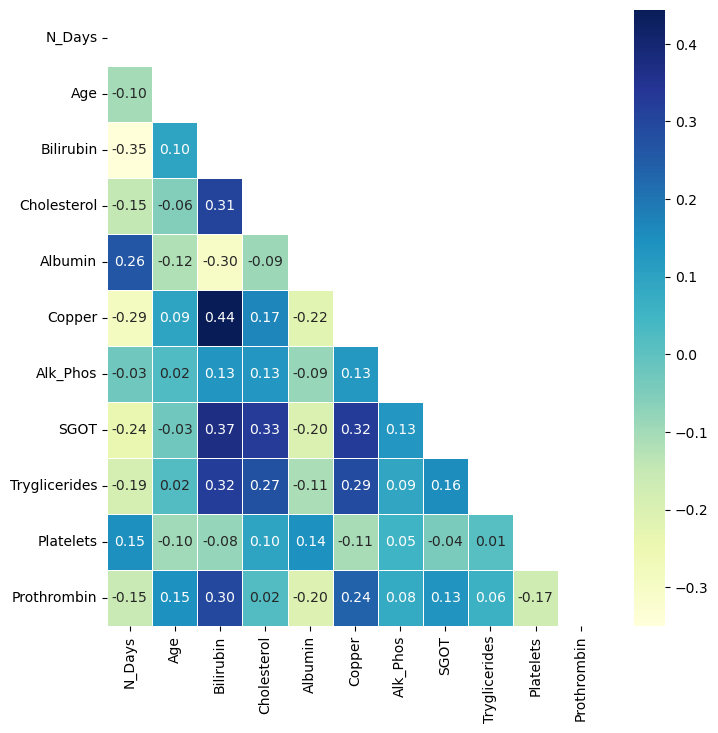

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(8,8))
corr_mat=train_to_scale.corr()
sns.heatmap(corr_mat,
            annot=True,
            mask=np.triu(corr_mat),
            fmt=".2f",
            cmap="YlGnBu",
            linewidth=0.5,
            )
plt.show()

## Preprocessing


In [30]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
scaled_train=pd.DataFrame(rs.fit_transform(train_to_scale),columns=train_to_scale.columns)
scaled_test=pd.DataFrame(rs.transform(test_to_scale),columns=test_to_scale.columns)

In [31]:
scaled_train.head()

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
0 -0.209733  0.504892  -0.260870    -0.062500  1.214286 -0.428571 -0.047898   
1  0.000000 -0.781996  -0.130435     0.173611 -0.166667 -0.412698  7.708504   
2  0.604524  0.302740  -0.304348    -0.291667 -0.761905 -0.380952 -0.331378   
3  1.540781  0.752446  -0.173913    -0.354167  1.214286 -0.682540  9.008602   
4  0.510624  0.199804  -0.217391     0.118056 -0.547619 -0.079365 -0.474096   

       SGOT  Tryglicerides  Platelets  Prothrombin  
0 -0.600000       0.763636  -0.349057         -0.4  
1 -0.575000       0.763636   0.000000          0.9  
2 -0.210323       0.400000   1.000000          0.8  
3  0.025000      -0.472727   0.311321         -0.5  
4 -0.600000      -0.836364  -0.792453         -0.7

In [32]:
set_frame_style(df.head())

In [33]:
train_OHE=df.drop(numeric_cols,axis='columns')
train_to_OHE=train_OHE.drop(['id','Status','Age_in_years'],axis='columns')
test_OHE=test.drop(numeric_cols,axis='columns')
test_to_OHE=test_OHE.drop(['id'],axis='columns')

set_frame_style(train_to_OHE.head())

In [34]:
set_frame_style(test_to_OHE.head())

## One-hot encoding categorical columns

In [35]:
ohe_train=pd.get_dummies(train_to_OHE,columns=train_to_OHE.columns)
ohe_test=pd.get_dummies(test_to_OHE,columns=test_to_OHE.columns)
ohe_train=ohe_train.replace({True:1,
                             False:0})
ohe_test=ohe_test.replace({True:1,
                           False:0})
set_frame_style(ohe_train.head())


Join scaled and one-hot encoded columns

In [36]:
train_df1=pd.concat([scaled_train,ohe_train],axis='columns')
test_df1=pd.concat([scaled_test,ohe_test],axis='columns')
set_frame_style(train_df1.head())

In [37]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8181 entries, 0 to 8180
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N_Days                8181 non-null   float64
 1   Age                   8181 non-null   float64
 2   Bilirubin             8181 non-null   float64
 3   Cholesterol           8181 non-null   float64
 4   Albumin               8181 non-null   float64
 5   Copper                8181 non-null   float64
 6   Alk_Phos              8181 non-null   float64
 7   SGOT                  8181 non-null   float64
 8   Tryglicerides         8181 non-null   float64
 9   Platelets             8181 non-null   float64
 10  Prothrombin           8181 non-null   float64
 11  Drug_D-penicillamine  8181 non-null   uint8  
 12  Drug_Placebo          8181 non-null   uint8  
 13  Sex_F                 8181 non-null   uint8  
 14  Sex_M                 8181 non-null   uint8  
 15  Ascites_N            

In [38]:
df.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status', 'Age_in_years', 'Thrombocytopenia', 'Normal_copper',
       'Normal_albumin', 'Normal_bilirubin'],
      dtype='object')

In [39]:

def tomek_links(X,y):

    tl=TomekLinks(sampling_strategy='auto')
    X_tl,y_tl=tl.fit_resample(X,y)
    return X_tl,y_tl


## Model Training

XGBClassifier

In [40]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

X=train_df1
y=df['Status']

#label encode target variable
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)
# X,y_encoded=tomek_links(X,y_encoded)


In [49]:
xgb_params={'max_depth': 11,
            'min_child_weight': 6, 
            'learning_rate': 0.011145059541788025, 
            'n_estimators': 1501, 
            'subsample': 0.9944143746449704, 
            'colsample_bytree': 0.05558811940209102, 
            'reg_alpha': 4.72472445023204e-05, 
            'reg_lambda': 0.09327705847941828}

# stratifiedKFold
n_splits=12
stratkf=StratifiedKFold(n_splits=n_splits,
                        shuffle=True,
                        random_state=42)
cv_results=[]

# stratified k-fold cross validation
for fold, (train_idx,val_idx) in enumerate(stratkf.split(X,y_encoded)):
    X_train,X_val=X.iloc[train_idx],X.iloc[val_idx]
    y_train,y_val=y_encoded[train_idx],y_encoded[val_idx]

    # XGBoost model
    xgb_model=XGBClassifier(**xgb_params)
    xgb_model.fit(X_train,y_train)

    # predictions on validation set
    y_val_predprob=xgb_model.predict_proba(X_val)

    # Evaluating the model
    logloss=log_loss(y_val,y_val_predprob)
    print(f"Fold {fold+1}, log-loss on validation set: {logloss}")

    cv_results.append(logloss)

print(f"Average log-loss across {n_splits} folds: {np.mean(cv_results)}")



Fold 1, log-loss on validation set: 0.41012810037408093
Fold 2, log-loss on validation set: 0.39863133445274046
Fold 3, log-loss on validation set: 0.4264035553682535
Fold 4, log-loss on validation set: 0.4120760228568236
Fold 5, log-loss on validation set: 0.40909842177105143
Fold 6, log-loss on validation set: 0.44632528748540284
Fold 7, log-loss on validation set: 0.40500164107368913
Fold 8, log-loss on validation set: 0.3740718425760953
Fold 9, log-loss on validation set: 0.4187581866920624
Fold 10, log-loss on validation set: 0.40189843212611265
Fold 11, log-loss on validation set: 0.433029164727751
Fold 12, log-loss on validation set: 0.44698572788219787
Average log-loss across 12 folds: 0.41520064311552174


In [51]:
import lightgbm as lgb
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier

lgbm_params={'boosting_type': 'dart', 
             'num_leaves': 47, 
             'max_depth': 28, 
             'learning_rate': 0.09373994418975978, 
             'n_estimators': 728, 
             'subsample': 0.34303304718905475, 
             'colsample_bytree': 0.07043501671366582, 
             'reg_alpha': 0.0005662697670428301, 
             'reg_lambda': 9.695815216065565,
             'verbosity':-1,
             'random_state':42}
n_splits=12
stratkf=StratifiedKFold(n_splits=n_splits,
                        shuffle=True,
                        random_state=42)
cv_results=[]

# stratified k-fold cross validation
for fold, (train_idx,val_idx) in enumerate(stratkf.split(X,y_encoded)):
    X_train,X_val=X.iloc[train_idx],X.iloc[val_idx]
    y_train,y_val=y_encoded[train_idx],y_encoded[val_idx]

    # LGBM model
    lgbm_model=LGBMClassifier(**lgbm_params)
    lgbm_model.fit(X_train,y_train)

    # predictions on validation set
    y_val_predprob=lgbm_model.predict_proba(X_val)

    # Evaluating the model
    logloss=log_loss(y_val,y_val_predprob)
    print(f"Fold {fold+1}, log-loss on validation set: {logloss}")

    cv_results.append(logloss)

print(f"Average log-loss across {n_splits} folds: {np.mean(cv_results)}")


Fold 1, log-loss on validation set: 0.420299621466463
Fold 2, log-loss on validation set: 0.39992376079170505
Fold 3, log-loss on validation set: 0.4218531513036613
Fold 4, log-loss on validation set: 0.40470373241802987
Fold 5, log-loss on validation set: 0.4094641590134309
Fold 6, log-loss on validation set: 0.4377863879087396
Fold 7, log-loss on validation set: 0.4009291160691189
Fold 8, log-loss on validation set: 0.37803633648719626
Fold 9, log-loss on validation set: 0.41674933808412995
Fold 10, log-loss on validation set: 0.4029861147195879
Fold 11, log-loss on validation set: 0.4269981010872042
Fold 12, log-loss on validation set: 0.44896515511313584
Average log-loss across 12 folds: 0.41405791453853363


In [52]:
from catboost import CatBoostClassifier
catboost_params={'iterations': 997, 
                 'depth': 10, 
                 'min_data_in_leaf': 29, 
                 'learning_rate': 0.028683858770312383}

n_splits=12
stratkf=StratifiedKFold(n_splits=n_splits,
                        shuffle=True,
                        random_state=42)
cv_results=[]

# stratified k-fold cross validation
for fold, (train_idx,val_idx) in enumerate(stratkf.split(X,y_encoded)):
    X_train,X_val=X.iloc[train_idx],X.iloc[val_idx]
    y_train,y_val=y_encoded[train_idx],y_encoded[val_idx]

    # CatBoost model
    catboost_model=CatBoostClassifier(**catboost_params,random_state=42,verbose=0)
    catboost_model.fit(X_train,y_train)

    # predictions on validation set
    y_val_predprob=catboost_model.predict_proba(X_val)

    # Evaluating the model
    logloss=log_loss(y_val,y_val_predprob)
    print(f"Fold {fold+1}, log-loss on validation set: {logloss}")

    cv_results.append(logloss)

print(f"Average log-loss across {n_splits} folds: {np.mean(cv_results)}")

Fold 1, log-loss on validation set: 0.4573734898750307


KeyboardInterrupt: 

In [55]:
from sklearn.ensemble import VotingClassifier

ensemble=VotingClassifier(estimators=[('lgb',lgbm_model),
                                      ('xgb',xgb_model),
                                      ('catboost',catboost_model)],
                          voting='soft')
ensemble.fit(X,y_encoded)

y_pred=ensemble.predict_proba(test_df1)
y_pred=pd.DataFrame(y_pred,columns=['Status_C','Status_CL','Status_D'])
y_pred.head()

Status_C  Status_CL  Status_D
0  0.384173   0.029208  0.586620
1  0.591406   0.149873  0.258722
2  0.049829   0.017297  0.932874
3  0.970938   0.003774  0.025288
4  0.845257   0.057427  0.097315

In [54]:
test_df1.shape

(5271, 36)

In [57]:
submission=pd.DataFrame()
submission=y_pred
submission['id']=ids
submission.head()

Status_C  Status_CL  Status_D    id
0  0.384173   0.029208  0.586620  7905
1  0.591406   0.149873  0.258722  7906
2  0.049829   0.017297  0.932874  7907
3  0.970938   0.003774  0.025288  7908
4  0.845257   0.057427  0.097315  7909

In [58]:
submission.to_csv("submission.csv",index=False)